<div style="float:left">
    <h1 style="width:600px">Workshop 8: Dimensionality Reduction</h1>
    <h3 style="width:600px">CASA0006: Data Science for Spatial Systems</h3>
    <h3 style="width:600px">Author: Huanfa Chen</h3>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

In this week's workshop, we will be revisiting the Boston house price dataset to see how we can use dimensionality reduction techniques to derive deeper understanding of the data.

This week we will again be working with Python, using the Pandas and sklearn library.

While we won't expect you to learn about every element of the data mining process, the intention is that you will be able to select and execute (using `sklearn`) an appropriate methodology for the in-depth analysis of your data. 

This tutorial will cover the use of **Principal Component Analysis (PCA)** and **t-SNE**. The methods used in `sklearn` are quickly and easily applicable across different approaches. By using a range of approaches, you'll begin to get a sense of how they differ in terms of function and output.

Let's first import the basic libraries we will need. `Pandas` for data import and handling, `matplotlib` for graphing non-Pandas arrays, and `Numpy` for maths tools. **Run the script below to get started.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

### Data Interrogation

**Note: we have used this dataset in the clustering workshop.**

The dataset you will use this week relates to house prices in Boston, USA. This dataset was put together by researchers at Carnegie Mellon University in the late 1970s to investigate the relationship between house prices and air pollution. There are 13 continous variables in the dataset and 1 binary-valued attribute (the **CHAS** attribute). According to the metadata [file](https://github.com/huanfachen/Spatial_Data_Science/blob/main/Dataset/metadata_boston_housing.txt), you will see the definition of these variables. Note that the variable of `MEDV` is the dependent variable and is excluded in the dimensionality reduction process.

| Variable      | Meaning          |
| ------------- | ------------- |
| CRIM| per capta crime rate by town.
| ZN| proportion of residential land zoned for lots over 25,000 sq.ft.
| INDUS| proportion of non-retail business acres per town
| CHAS| Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
| NOX| nitric oxides concentration (parts per 10 million)
| RM| average number of rooms per dwelling
| AGE| proportion of owner-occupied units built prior to 1940
| DIS| weighted distances to five Boston employment centres
| RAD| index of accessibility to radial highways
| TAX| full-value property-tax rate per \$10,000
| PTRATIO| pupil-teacher ratio by town
| B| 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
| LSTAT| % lower status of the population
| MEDV| Median value of owner-occupied home in $1000's.

**In this workshop, we try to answer the following questions**:

1. What is the result of using PCA on these variables?
1. Can PCA improve the linear regression model?
1. What are the implications of t-SNE on this dataset?

**Based on what you know from using Pandas over the last few weeks, import the Boston housing dataset on Github as a Pandas dataframe (call it `boston`), inspect the data, calculate summary statistics on all attributes, and general simple plots of pairs of attributes.**

In [2]:
boston = pd.read_csv('https://raw.githubusercontent.com/huanfachen/Spatial_Data_Science/main/Dataset/boston_housing.csv')

In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.3636,11.1368,0.0692,0.5547,6.2846,68.5749,3.7950,9.5494,408.2372,18.4555,356.6740,12.6531,22.5328
std,8.6015,23.3225,6.8604,0.2540,0.1159,0.7026,28.1489,2.1057,8.7073,168.5371,2.1649,91.2949,7.1411,9.1971
min,0.0063,0.0000,0.4600,0.0000,0.3850,3.5610,2.9000,1.1296,1.0000,187.0000,12.6000,0.3200,1.7300,5.0000
25%,0.0820,0.0000,5.1900,0.0000,0.4490,5.8855,45.0250,2.1002,4.0000,279.0000,17.4000,375.3775,6.9500,17.0250
50%,0.2565,0.0000,9.6900,0.0000,0.5380,6.2085,77.5000,3.2074,5.0000,330.0000,19.0500,391.4400,11.3600,21.2000
75%,3.6771,12.5000,18.1000,0.0000,0.6240,6.6235,94.0750,5.1884,24.0000,666.0000,20.2000,396.2250,16.9550,25.0000
max,88.9762,100.0000,27.7400,1.0000,0.8710,8.7800,100.0000,12.1265,24.0000,711.0000,22.0000,396.9000,37.9700,50.0000


## PCA

PCA is a workhorse dimensionality reduction method, which is simple, fast, and effective. It can be thought of as freely rotating axes to align with directions of maximum variance. This is a nice summary of PCA:

> PCA (Principal Components Analysis) gives us our ideal set of features. It creates a set of principal components that are **rank ordered by variance** (the first component has higher variance than the second, the second has higher variance than the third, and so on), **uncorrelated** (all components are orthogonal), and **low in number** (we can throw away the lower ranked components as they contain little signal).

I also strongly recommend [this exposition](https://towardsdatascience.com/understanding-pca-fae3e243731d) in Towards Data Science.

In this part, we will use the PCA for the given variables excluding the **MEDV** variable. The documentation of PCA in the ```sklearn``` package is [here ](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [5]:
# separate the independent and dependent variables
X = boston.drop('MEDV', axis=1).values

# the name list of independent variables
list_var_X = boston.columns.tolist()
list_var_X.remove('MEDV')

y = boston.loc[:,['MEDV']].values

In [6]:
# standardisation of the X. This is essential for PCA.
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [7]:
from sklearn.decomposition import PCA
rand_st_int = 10 
pca = PCA(random_state=rand_st_int)
# fit the components
X_new_components = pca.fit_transform(X)
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]


Next, we will inspect the components by creating a data frame. They are sorted by **explain_variance_**, meaning the proportion of variance of the data that is explained by this new dimension. Each row corresponds to a component, specifying how this component is formed via the linear combination of the original variables.

**Can you identify which original variables are more important than the others for the first component?**

In [8]:
print(list_var_X)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [9]:
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X)
df_PrincipleComp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.2510,-0.2563,0.3467,0.0050,0.3429,-0.1892,0.3137,-0.3215,0.3198,0.3385,0.2049,-0.2030,0.3098
1,-0.3153,-0.3233,0.1125,0.4548,0.2191,0.1493,0.3120,-0.3491,-0.2715,-0.2395,-0.3059,0.2386,-0.0743
2,0.2466,0.2959,-0.0159,0.2898,0.1210,0.5940,-0.0177,-0.0497,0.2873,0.2207,-0.3234,-0.3001,-0.2670
3,0.0618,0.1287,0.0171,0.8159,-0.1282,-0.2806,-0.1752,0.2154,0.1323,0.1033,0.2826,0.1685,0.0694
4,0.0822,0.3206,-0.0078,0.0865,0.1369,-0.4234,0.0167,0.0986,-0.2041,-0.1305,-0.5840,-0.3456,0.3946
5,-0.2197,-0.3234,-0.0761,0.1675,-0.1530,0.0593,-0.0717,0.0234,-0.1432,-0.1929,0.2732,-0.8035,-0.0532
6,0.7776,-0.2750,-0.3396,0.0741,-0.1996,0.0639,0.1160,-0.1039,-0.1379,-0.3149,0.0023,0.0703,0.0870
7,0.1534,-0.4027,0.1739,-0.0247,0.0801,-0.3268,-0.6008,-0.1218,0.0804,0.0828,-0.3179,-0.0049,-0.4244
8,0.2604,0.3581,0.6444,-0.0137,-0.0185,0.0479,-0.0676,-0.1533,-0.4709,-0.1766,0.2544,-0.0449,-0.1952
9,0.0194,0.2675,-0.3635,-0.0062,0.2311,-0.4314,0.3628,-0.1712,0.0219,-0.0352,0.1534,-0.0965,-0.6007


As below, you can see the proportion of variance explained by each component.

In [9]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]


You can get the eigen values of the PCA. The ```..explained_variance_``` gives the actual eigen values.

In [10]:
print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[6.1389812  1.43611329 1.2450773  0.85927328 0.83646904 0.65870897
 0.5364162  0.39688167 0.27749173 0.22067394 0.18638271 0.16963823
 0.06363502]


One of the use of PCA is to visualise high-dimensional data. Here we can visualise the first two components.

Text(0, 0.5, 'PC2')

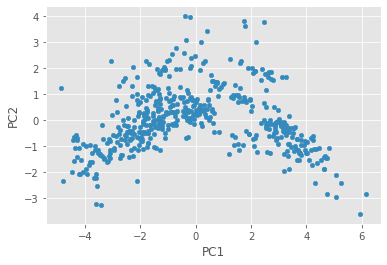

In [11]:
df_X_new_coord = pd.DataFrame(X_new_components)
ax = df_X_new_coord.plot.scatter(x = 0, y = 1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

This graph is not very informative or useful though. However, if you have an extra label for the data points (e.g. high, medium, and low-price), you can colour the points by the labels and check if each category forms a cluster in the new new space.

I like [this example](https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/) of using PCA for visualising data clusters.

## Selecting the number of components

In the lecture, we talked about three methods to select the number of PCA components.

1. Using two or three dimensions for visualisation;
2. Retaining components with eigenvalues larger than one;
3. Using Scree plot to locate a point that occurs just before the Scree plot flattens out.

Following the Rule 2, we would choose three components from PCA, as they have eigenvalues larger than one.

How about Rule 3? Let's try the Scree plot.

<AxesSubplot:xlabel='PC'>

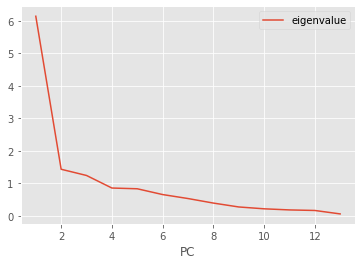

In [12]:
df = pd.DataFrame({'eigenvalue':pca.explained_variance_,
             'PC':list(range(1, pca.n_components_ + 1))})
df.plot.line(x = 'PC', y = 'eigenvalue')

The point just before the graph flattens out is ```PC=2```, so two components should be chosen.

In practice, you can decide which rule to use.

## Linear Regression

Another use of PCA is that it may improve the performance of data analysis. First, if only a few principal components are used for model training, the required memory and computation time is reduced. Second, as the principal components are linearly independent, they are not subject to the multicollinearity issue. 

To demonstrate this, let us build a multiple linear regression model to predict the house price, and then compare it with another linear regression model using three components in the next part.

### Step 1: split the data into training and testing set. 

Remember that this is very important to measure the predictive performance of the models.

In [13]:
from sklearn.model_selection import train_test_split
split_rand_state = 1
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=split_rand_state)

### Step 2: build a linear regression model using the training data

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=train_X, y=train_y)

LinearRegression()

### Step 3: measure model performance using the testing data

We use R2 as the performance metric for linear regression.

In [15]:
lr.score(X=test_X, y=test_y)

0.7789410172622857

## PCA regression

We will try to build another linear regression model using the principal components. This method is called **Principle Component Regression** (denoted by PCR). See [this post](https://blogs.sas.com/content/iml/2017/10/25/principal-component-regression-drawbacks.html) for the pros and cons of this method. 

One of the main advantages of using PCR is that it can perform regression when the independent variables are highly correlated or collinear.

In this part, we will use the first three principal components in the regression.

In [16]:
# create a new X dataset including three PCs
X_three_pc = X_new_components[:,[0,1,2]]

In [17]:
# split the traing and testing dataset
split_rand_state = 1
train_X_pc, test_X_pc, train_y_pc, test_y_pc = train_test_split(X_three_pc, y, random_state=split_rand_state)

In [18]:
# train a new model
lr_pc = LinearRegression()
lr_pc.fit(X=train_X_pc, y=train_y_pc)

LinearRegression()

In [19]:
# measure the model performance
lr_pc.score(X=test_X_pc, y=test_y_pc)

0.6967605839062907

The R2 score shows that the performance of the new model is not as good as the previous one. This indicaetes that PCR does not always lead to a more accurate model. This can be explained by that some information of the dataset is lost when only the three components are used. Another potential reason is that "there is no a priori reason to believe that the principal components with the largest variance are the components that best predict the response", which is discussed in this [post](https://blogs.sas.com/content/iml/2017/10/25/principal-component-regression-drawbacks.html).

We have demonstrated how to use principal components in regression. Next we are going to practice another dimensionality reduction technique, **t-Distributed Stochastic Neighbor Embedding** (t-SNE).

# t-SNE

t-Distributed Stochastic Neighbour Embedding is best understood as a **visualisation** technique, not an **analytical** one. This is because it is *probabilistic* and not *deterministic*. 

![](https://github.com/huanfachen/Spatial_Data_Science/raw/main/Images/tsne-fashion.png)

In this part, we will use t-SNE to visualise the dataset in a 2-D plot.

In practice, the choice of ```perplexity``` and ```n_iter``` at instantiation matters. We ignore the ```n_iter``` and use the default value of 1000 for this parameter. [Here](https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html) is a good post on the effect of the ```perplexity``` parameter on the result.

Note that t-SNE is much harder computationally and it may be preferrable on very high-dim data sets to apply PCA first and then t-SNE to the reduced data set.

We will test a range of perplexity values between 5 and 50 on the Boston house price dataset. The computation time will be recorded and printed, as t-SNE might be quite slow for a large dataset.

circles, perplexity=5 in 10 sec
circles, perplexity=10 in 12 sec
circles, perplexity=20 in 8.6 sec
circles, perplexity=50 in 10 sec


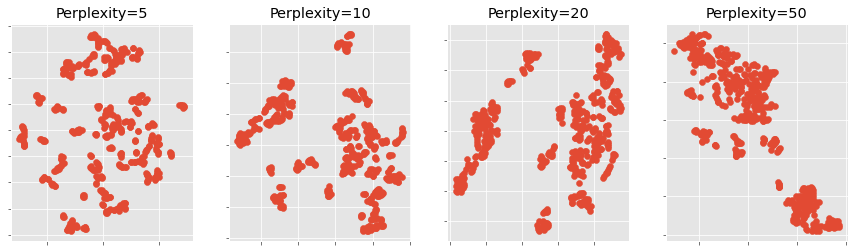

In [20]:
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

# 2 new dimensions will be generated by t-SNE
n_components = 2
(fig, subplots) = plt.subplots(1, 4, figsize=(15, 4), squeeze=False)
perplexities = [5, 10, 20, 50]
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1])
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

The result shows different patterns of the house price dataset. However, it is not very useful as we haven't put labels to the points.

If you are interested in this method, you can further explore in these directions:

1. Perform clustering analysis on the dataset to get the cluster labels, and use t-SNE to visualise the clustering result by using the cluster number as labels.
2. Divide the **MEDV** variable into several intervals, and use it as the labels of points in the t-SNE plot. Be careful with the cut-off values. Can you find any relatinship between the house price and t-SNE results? Is there a cluster of high-price house in the plot?

# Conclusion

In this workshop, we have practiced PCA, PCA regression, and t-SNE on the Boston housing data. 

You can use these methods on your own dataset, especially when the data have a high dimension is difficult to understand and analyse.

If you are interested, you can learn other methods for dimensionality reduction, such as UMAP. The resource below would be useful.

# Resources

- Rethinking 'distance' in New York City *Medium* [URL](https://medium.com/topos-ai/rethinking-distance-in-new-york-city-d17212d24919)
- Five Boroughs for the 21st Century *Medium* [URL](https://medium.com/topos-ai/five-boroughs-for-the-21st-century-8da941f53618)
- [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)
- [The Curse of Dimensionality](https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e)
- [Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)
- [Understanding PCA](https://towardsdatascience.com/understanding-pca-fae3e243731d)
- [Introduction to t-SNE in Python](https://www.datacamp.com/community/tutorials/introduction-t-sne)
- [How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/)
- [How to tune the Hyperparameters of t-SNE](https://towardsdatascience.com/how-to-tune-hyperparameters-of-tsne-7c0596a18868)
- [Understanding UMAP](https://pair-code.github.io/understanding-umap/) (Compares to t-SNE)
- [How UMAP Works](https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668)
- [3 New Techniques for Data-Dimensionality Reduction in ML](https://thenewstack.io/3-new-techniques-for-data-dimensionality-reduction-in-machine-learning/)
- [UMAP for Dimensionality Reduction](https://www.youtube.com/watch?v=nq6iPZVUxZU) (Video)
- [A Bluffer's Guide to Dimensionality Reduction](https://www.youtube.com/watch?v=9iol3Lk6kyU) (Video)

# Acknowledgements

This workshop is partly based on a [notebook](https://github.com/jreades/i2p/blob/master/lectures/9.3-Dimensionality.md) developed by [Jon Reades](https://github.com/jreades), which is part of the CASA00013 module.